In [2]:
# 1. 데이터 로드
import pandas as pd

# 데이터 로드
# df = pd.read_csv('simple_field.csv', encoding='utf-8')
df = pd.read_csv('simple_field.csv', encoding='utf-8')

# 데이터 확인
df.tail(4)

,항목,대화
5476,자해/자살,Q: 우리 친구는 어떨 때 마음이 복잡하거나 힘들어? A: 엄마가 저 죽어버렸으면 ...
5477,방임,Q: 집에서 주로 나를 돌봐주는 사람은 누구인가요? A: 돌봐주는 사람은 없는 것 ...
5478,트라우마,Q: 평소에 잠이 들기 힘들거나 잠자는 중간에 자주 깨니? A: 악몽을 꾸다가 깬 ...
5479,신체학대,Q: 주위 어른이나 가족들 중에 친구를 때렸던 사람이 있어? A: 아빠가 때렸다고 ...


In [3]:
# 2. 데이터 전처리 및 특성 추출
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt

# 특성과 레이블 분리
X = df['대화']
y = df['항목']

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Okt 형태소 분석기를 이용한 토크나이저 함수 정의
okt = Okt()


def okt_tokenizer(text):
    return okt.morphs(text)


# TF-IDF 벡터라이저를 이용하여 텍스트를 수치화
vectorizer = TfidfVectorizer(tokenizer=okt_tokenizer, max_features=5000)
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

In [4]:
# 3. 나이브 베이즈 모델 정의 및 학습
from sklearn.naive_bayes import MultinomialNB

# 모델 정의
model = MultinomialNB()

# 모델 학습
model.fit(X_train_vectors, y_train)

MultinomialNB()

In [5]:
# 4. 모델 평가
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test_vectors)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# 분류 보고서 출력
print("Classification Report:\n", classification_report(y_test, y_pred))

# 혼돈 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 클래스 레이블 추출
labels = model.classes_

Accuracy: 0.8877737226277372
F1 Score: 0.8756765123999207
Classification Report:
               precision    recall  f1-score   support

        가정폭력       0.93      0.98      0.95        63
          방임       0.75      1.00      0.86        97
         성학대       1.00      0.98      0.99        50
        신체학대       0.98      1.00      0.99       133
       자해/자살       0.82      1.00      0.90        77
        정서학대       0.85      1.00      0.92       193
        트라우마       0.89      1.00      0.94       191
        학교폭력       1.00      0.86      0.93        72
        해당없음       0.93      0.50      0.65       220

    accuracy                           0.89      1096
   macro avg       0.90      0.92      0.90      1096
weighted avg       0.90      0.89      0.88      1096



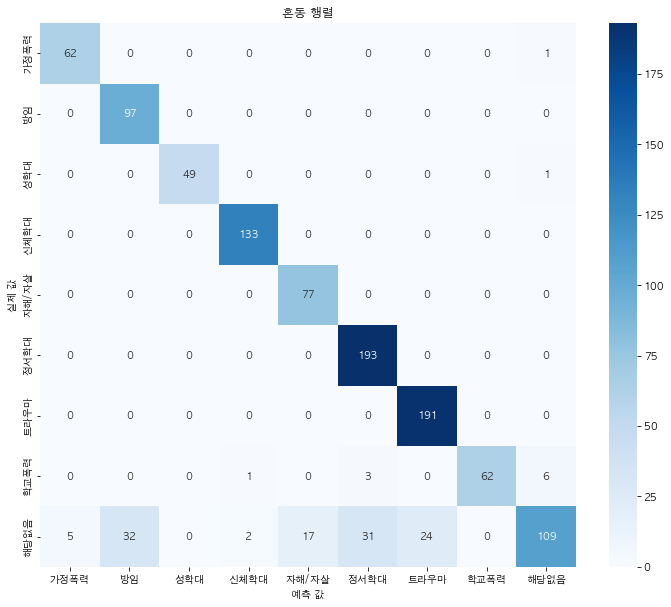

In [11]:
# 5. 결과 시각화
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 혼돈 행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels,
            yticklabels=labels, cmap='Blues')
plt.ylabel('실제 값', weight='bold')
plt.xlabel('예측 값', weight='bold')
plt.title('혼동 행렬', weight='bold', size=12)
plt.show()